# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [434]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=0"

In [435]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np

In [ ]:
## YOUR CODE HERE

#my model was working okay last night. I don't know why it's not working right now.


page = urllib2.urlopen(URL)

#parse the page
soup = BeautifulSoup(requests.get(URL).text)

#extracting all results
result = soup.find("div", {"class": "row result"},'lxml')


Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above

## YOUR CODE HERE
def extract_location_from_result(result):
    for loc in soup.findAll('span', {'class':'location'}):
        return loc.get_text(strip=True)

def extract_company_from_result(result):
    for loc in soup.findAll('span', {'class':'company'}):
        return loc.get_text(strip=True)

salary = []

def extract_salary_from_result(result):
    for loc in soup.findAll('span', {'class': 'location'}):
        Sibling = soup.findNextSiblings('div')
        if Sibling != None:
            salary.append(loc.text.strip())
        else:
            salary.append(np.nan)

def extract_title_from_result(result):
    for loc in soup.findAll('a', {'data-tn-element':'jobTitle'}):
        return loc['title']
    
#print extract_title_from_result(result)


In [437]:
#def extract_text(el):
#    if el:
#        return el.text.strip()
#    else:
#        return ''
        
def extract_company_from_result(result):
    return result.find('span', {'class' : 'company'}).text.strip()

def extract_location_from_result(result):
    return  result.find('span', {'class' : 'location'}).text.strip()

#def extract_summary_from_result(result):
#    return  extract_text(result.find('span', {'class' : 'summary'}))

def extract_title_from_result(result):
    return result.find('a', {'data-tn-element' : 'jobTitle'}).text.strip()

def extract_salary_from_result(result):
    salary_table = result.find('td', {'class' : 'snip'})
    if salary_table:
        snip = salary_table.find('nobr')
        if snip:
            return snip.text.strip()
        else:
            return np.nan
        
#print extract_salary_from_result(result)

In [438]:
lst1 = [loc.get_text(strip=True) for loc in soup.findAll('span', {'class':'company'})]
print (lst1)

lst2 = [loc.get_text(strip=True) for loc in soup.findAll('span', {'class':'location'})]
print (lst2)

lst3 = [loc.get_text(strip=True) for loc in soup.findAll('a', {'data-tn-element':'jobTitle'})]#dual conditions?
print (lst3)

#lst3 = [loc.findNextSibling('div') for loc in soup.findAll('div', {'class':'sjcl'})]
#print (lst3)


[u'Uber', u'AbilTo, Inc', u'ZoomRx', u'Globant', u'NBCUniversal', u'Memorial Sloan Kettering Cancer Center', u'Bloomberg', u'Columbia University', u'eTemp', u'NBCUniversal', u'CAPCO', u'Celmatix', u'S&P Global Ratings', u'1010data', u'Chegg']
[u'New York, NY', u'New York, NY', u'New York, NY', u'New York, NY', u'New York, NY', u'New York, NY 10065(Upper East Side area)', u'New York, NY', u'New York, NY', u'New York, NY', u'New York, NY', u'New York, NY 10271(Financial District area)', u'New York, NY 10005(Financial District area)', u'New York, NY 10002(Lower East Side area)', u'New York, NY', u'New York, NY']
[u'DataScientist- Monitoring & Anomaly Detection Platform', u'DataScientist', u'Associate Consultant - Biotech/Pharma Market Research', u'SsrDataScientist(R, Tableau, Python)', u'DataEngineer, Analytics Technology', u'BioinformaticsDataScientist- Cancer Genomics, NYC', u'Machine Learning Engineer', u'Associate ResearchScientist', u'Mid - Senior LevelDataScientist', u'Research Anal

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [439]:
YOUR_CITY = 'Atlanta'

In [440]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%24{}%2C000&l={}&start={}"
max_results_per_city = 500

rows = []

#look through each cities
for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Los+Angeles',YOUR_CITY,'Seattle']):
    #look through pages
    for start in range(0, max_results_per_city, 10):
        #parse the page
        #If the salary is set to 0, the link will search for just the term data scientist
        #If the salary is set to 100, the link will search for data scientist with $100k+ salary
        for salary in set([0,100]):
            url = url_template.format(salary,city,start)
            soup = BeautifulSoup(requests.get(url).text)
            #extracting all results
            results = soup.findAll("div", {"class": "row result"})
            #search data scienctist without any specific salary
            if salary == 0:
                for result in results:
                    if result:
                        row = {}
                        row['title'] =  extract_title_from_result(result)
                        row['company'] = extract_company_from_result(result)
                        row['salary'] = 0 #add 0s for salary under 100k
                        row['city'] = city
                        rows.append(row)
            #search data scientist with $100k salary       
            else:
                for result in results:
                    if result:
                        row = {}
                        row['title'] =  extract_title_from_result(result)
                        row['company'] = extract_company_from_result(result)
                        row['salary'] = 1 #add 1s for salary 100k and over
                        row['city'] = city
                        rows.append(row)
                    

In [441]:
rows

[{'city': 'Chicago',
  'company': u'Gallup',
  'salary': 0,
  'title': u'Data Scientist \u2013 Predictive Analytics'},
 {'city': 'Chicago',
  'company': u'CVS Health',
  'salary': 0,
  'title': u'Predictive Modeling, Strategic Analytics'},
 {'city': 'Chicago',
  'company': u'Allstate Insurance',
  'salary': 0,
  'title': u'Machine Learning Engineer - Connected Car'},
 {'city': 'Chicago',
  'company': u'Gallup',
  'salary': 1,
  'title': u'Data Scientist \u2013 Predictive Analytics'},
 {'city': 'Chicago',
  'company': u'Allstate Insurance',
  'salary': 1,
  'title': u'Senior Telematics Data Scientist'},
 {'city': 'Chicago',
  'company': u'Parallel Partners',
  'salary': 1,
  'title': u'Junior Quantitative Research Analyst - MS062161'},
 {'city': 'Chicago',
  'company': u'CVS Health',
  'salary': 0,
  'title': u'Predictive Modeling, Strategic Analytics'},
 {'city': 'Chicago',
  'company': u'Parexel International',
  'salary': 0,
  'title': u'Senior Statistical Programmer (Home Based)'},


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [458]:
## YOUR CODE HERE

#create a dataframe
data = pd.DataFrame.from_records(rows)


#data.describe()
#data.sort_values(by='salary')

#drop duplicates but keep the last. Since there was a duplicate result for a search with the salary requirement of 100k
#one without, drop the first one and keep the last search which is for 100k.
data = data.drop_duplicates(['city','company','title'],keep='last')
data.head(20)

,city,company,salary,title
292,Chicago,Parallel Partners,0,Junior Quantitative Research Analyst - MS062161
298,Chicago,CyberCoders,0,Senior Data Scientist
302,Chicago,United Airlines,0,Senior Analyst - Statistics and Operations Res...
319,Chicago,Allstate Insurance,1,Data Science Manager
321,Chicago,Parexel International,0,Senior Statistical Programmer (Home Based)
322,Chicago,Thermo Fisher Scientific,0,Applications Scientist
324,Chicago,Parexel International,0,"Associate Manager, Statistical Programming"
325,Chicago,Rush University Medical Center,0,Post Doctoral Research Fellow - Epidemiology
326,Chicago,Sysmex,0,"Scientist I, Technical Support - Sysmex Inostics"
327,Chicago,CVS Health,0,"Predictive Modeling, Strategic Analytics"


Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [459]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [460]:
## YOUR CODE HERE

### Save your results as a CSV

In [461]:
## YOUR CODE HERE

datadata = data.to_csv('../assets/cleanIndeed1.csv',encoding='utf-8')

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [462]:
## YOUR CODE HERE

#data = pd.DataFrame.from_csv('../assets/cleanIndeed.csv')

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [463]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [464]:
## YOUR CODE HERE

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [465]:
#create dummy variables for cities
dummy_location = pd.get_dummies(data['city'], prefix='city')
cols_to_keep = ['company', 'salary', 'title']
handCalc = data[cols_to_keep].join(dummy_location.ix[:, :])
#print handCalc.head()
#print pd.crosstab(handCalc['salary'], handCalc['city_New+York'], rownames=['salary'])

In [491]:
## YOUR CODE HERE
import statsmodels.api as sm
cols_to_keep = ['city', 'salary', 'title']
df = data[cols_to_keep].join(dummy_location.ix[:, 'city_Austin':])
#print df.head()
df['intercept'] = 1.0
#print df.ix[:, df.columns != 'salary']

#use statsmodels to perform logistic regression
logit = sm.Logit(df['salary'], df.ix[:,3:])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.616280
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                  115
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            6
Date:                Fri, 01 Jul 2016   Pseudo R-squ.:                 0.08886
Time:                        14:38:36   Log-Likelihood:                -70.872
converged:                       True   LL-Null:                       -77.784
                                        LLR p-value:                   0.03167
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
city_Austin            0.0308      0.657      0.047      0.963        -1.256     1.318
city_Chicago          -1.8281      0.704     -2.598      0.009        -3.207    -0.449
city_Los+Angeles       0.3409      0.638      0.534      0.593        -0.909     1.591
city_New+York          0.2356      0.731      0.322      0.747        -1.198     1.669
city_San+Francisco    -0.5754      0.757     -0.760      0.447        -2.060     0.909
city_Seattle           0.4055      0.795      0.510      0.610        -1.153     1.964
intercept              0.5754      0.417      1.381      0.167        -0.241     1.392
======================================================================================
"""

In [492]:
dfNew = df

#make a column for prediction and use the model to get the probability
dfNew['prediction'] = result.predict(df.ix[:,3:])
threshold = 0.5

#make a column and use a threshold of 0.5(best threshold I could find) to predict whether it's 0 or 1.
dfNew['approxPredict'] = [0 if i<threshold else 1 for i in dfNew['prediction']]

#confusion matrix of the results
#print pd.crosstab(dfNew['approxPredict'],dfNew['salary'], rownames=['predicted'])

dfNew.head()

,city,salary,title,city_Austin,city_Chicago,city_Los+Angeles,city_New+York,city_San+Francisco,city_Seattle,intercept,prediction,approxPredict
292,Chicago,0,Junior Quantitative Research Analyst - MS062161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.222222,0
298,Chicago,0,Senior Data Scientist,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.222222,0
302,Chicago,0,Senior Analyst - Statistics and Operations Res...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.222222,0
319,Chicago,1,Data Science Manager,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.222222,0
321,Chicago,0,Senior Statistical Programmer (Home Based),0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.222222,0


In [468]:
#numerical values of the coefficients and how strongly they affect the salary compared to Atlanta(since Atlanta was dropped)
print np.exp(result.params)
params = result.params

#confidence interval of 2.5% and 97.5%
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

city_Austin           1.031250
city_Chicago          0.160714
city_Los+Angeles      1.406250
city_New+York         1.265625
city_San+Francisco    0.562500
city_Seattle          1.500000
intercept             1.777778
dtype: float64
                        2.5%     97.5%        OR
city_Austin         0.284724  3.735115  1.031250
city_Chicago        0.040472  0.638193  0.160714
city_Los+Angeles    0.402775  4.909788  1.406250
city_New+York       0.301902  5.305712  1.265625
city_San+Francisco  0.127481  2.481979  0.562500
city_Seattle        0.315812  7.124483  1.500000
intercept           0.785616  4.022951  1.777778


In order to get a 6-figure salary, it's best to go to these cities with higher exp(coef) values. 

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [469]:
## YOUR CODE HERE


#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [490]:
## YOUR CODE HERE
from sklearn import linear_model

#scikit-learn logistic regression model
lm = linear_model.LogisticRegression()
#target variable/predictor is salary
y = df[['salary']]
#using all the dummy variables as predictors
X = df.ix[:,3:]

result = lm.fit(X,y)

#predicted values from the scikit-learn logistic regression model
predictions = lm.predict(X)

dfLin = df

dfLin['prediction'] = result.predict(df.ix[:,3:])

dfLin.head()
#plt.bar(predictions,y)
#predictions
threshold = 0.5

#make a column and use a threshold of 0.5(best threshold I could find) to predict whether it's 0 or 1.
dfLin['approxPredict'] = [0 if i<threshold else 1 for i in dfLin['prediction']]

#confusion matrix of the results
print pd.crosstab(dfLin['approxPredict'],dfLin['salary'], rownames=['predicted'])

salary      0   1
predicted        
0          14   4
1          33  64


/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [471]:
## YOUR CODE HERE
from sklearn.cross_validation import train_test_split
y = df.salary
X = df.ix[:,3:]

#cross validation: setting up my train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#creating a model using train sets
logReg = sm.Logit(y_train,X_train)
result = logReg.fit()
result.summary()

         Current function value: 0.625375
         Iterations: 35


/Users/SangYeob/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 salary   No. Observations:                   80
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                            6
Date:                Fri, 01 Jul 2016   Pseudo R-squ.:                 0.07729
Time:                        09:00:03   Log-Likelihood:                -50.030
converged:                      False   LL-Null:                       -54.220
                                        LLR p-value:                    0.2115
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
city_Austin            0.4905    6.8e+04   7.21e-06      1.000     -1.33e+05  1.33e+05
city_Chicago          -0.8200        nan        nan        nan           nan       nan
city_Los+Angeles       0.5767   7.16e+05   8.05e-07      1.000      -1.4e+06   1.4e+06
city_New+York          0.1775   5.04e+05   3.52e-07      1.000     -9.88e+05  9.88e+05
city_San+Francisco    -0.2786   1.35e+06  -2.06e-07      1.000     -2.65e+06  2.65e+06
city_Seattle           0.7553   8.41e+05   8.98e-07      1.000     -1.65e+06  1.65e+06
intercept             -0.3418        nan        nan        nan           nan       nan
prediction             0.2844   9.64e+06   2.95e-08      1.000     -1.89e+07  1.89e+07
approxPredict          0.4782        nan        nan        nan           nan       nan
======================================================================================
"""

In [472]:
#the actual values and the p values from the table above shows that most of my variables doesn't mean anything
print np.exp(result.params)
params = result.params
#confidence interval for the cross validation train set model
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

city_Austin           1.633082
city_Chicago          0.440421
city_Los+Angeles      1.780177
city_New+York         1.194225
city_San+Francisco    0.756810
city_Seattle          2.128337
intercept             0.710503
prediction            1.328919
approxPredict         1.613234
dtype: float64
                    2.5%  97.5%        OR
city_Austin          0.0    inf  1.633082
city_Chicago         NaN    NaN  0.440421
city_Los+Angeles     0.0    inf  1.780177
city_New+York        0.0    inf  1.194225
city_San+Francisco   0.0    inf  0.756810
city_Seattle         0.0    inf  2.128337
intercept            NaN    NaN  0.710503
prediction           0.0    inf  1.328919
approxPredict        NaN    NaN  1.613234


In [486]:
X_test['actualSalary'] = y_test
dfTrain = X_test
dfTrain['predictedSalary'] = result.predict(dfTrain[dfTrain.columns[0:7]])
xyz = dfTrain['predictedSalary']
threshold = 0.4
dfTrain['approxPredict'] = [0 if i<threshold else 1 for i in xyz]

#confusion matrix cross validation model
print pd.crosstab(dfTrain['approxPredict'],dfTrain['actualSalary'], rownames=['predicted'])

ValueError: X has 7 features per sample; expecting 9

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [493]:
## YOUR CODE HERE
#L1 = Lasso
#penalizes the coeffecients by dropping coefficients

sparse_logreg = linear_model.LogisticRegression(penalty='l1', C=0.0001)
y = df[['salary']]
#using all the dummy variables as predictors
X = df.ix[:,3:]
result = sparse_logreg.fit(X,y)
predictions = sparse_logreg.predict(X)

dfLasso = df

dfLasso['prediction'] = result.predict(df.ix[:,3:])


threshold = 0.5

#make a column and use a threshold of 0.5(best threshold I could find) to predict whether it's 0 or 1.
dfLasso['approxPredict'] = [0 if i<threshold else 1 for i in dfLasso['prediction']]

#confusion matrix of the results
#print pd.crosstab(dfLasso['approxPredict'],dfLasso['salary'], rownames=['predicted'])

print np.exp(result.params)
params = result.params
#confidence interval for the cross validation train set model
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'LogisticRegression' object has no attribute 'params'

In [488]:
## YOUR CODE HERE
#L2 = Ridge
#penalizes the coefficients by reducing the coefficients by ^2. 
shrunk_logreg = linear_model.LogisticRegression(penalty='l2', C=1000.0)

y = df[['salary']]
#using all the dummy variables as predictors
X = df.ix[:,3:]
result = shrunk_logreg.fit(X,y)
predictions = shrunk_logreg.predict(X)

dfRidge = df

dfRidge['prediction'] = result.predict(df.ix[:,3:])


threshold = 0.5

#make a column and use a threshold of 0.5(best threshold I could find) to predict whether it's 0 or 1.
dfRidge['approxPredict'] = [0 if i<threshold else 1 for i in dfRidge['prediction']]

#confusion matrix of the results
print pd.crosstab(dfRidge['approxPredict'],dfRidge['salary'], rownames=['predicted'])

salary      0   1
predicted        
0          14   4
1          33  64


/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


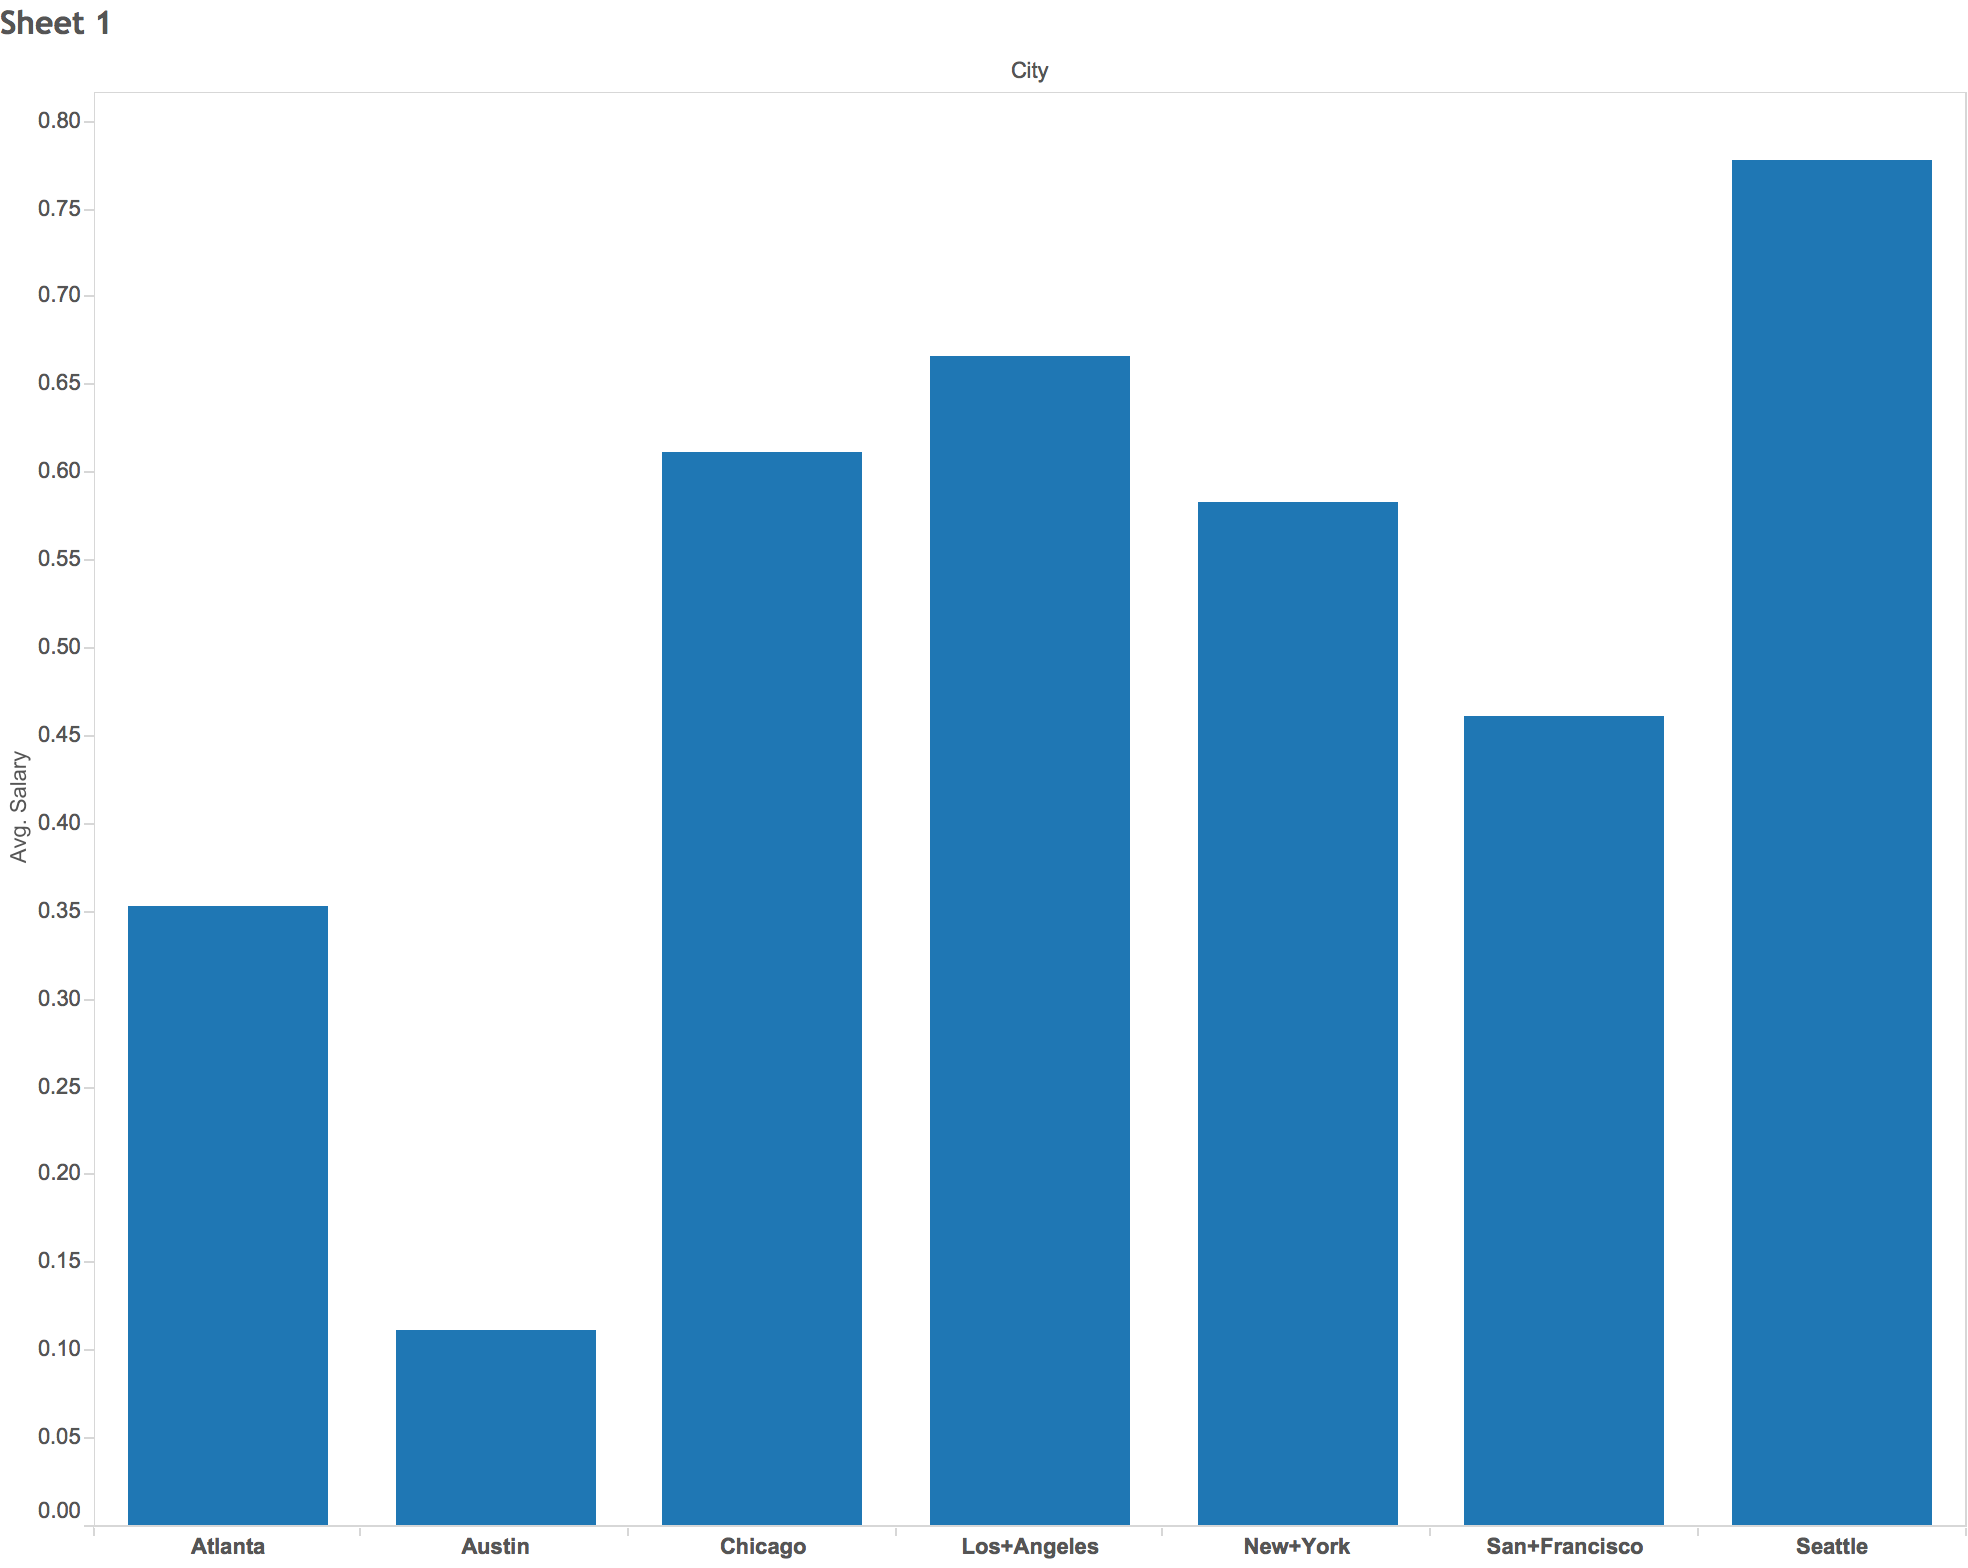

In [474]:
from IPython.display import Image
from IPython.display import display
%matplotlib inline
#tableau picture that lists total sales by zip codes
x = Image(filename='../assets/images/average salary.png')
display(x)
#the bargraph is average of the salaries. If the number is higher, it means that those particular cities have
#more number of jobs that is in 6 figures.

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [ ]:
## YOUR CODE HERE